<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Khazhinsky_Unit8Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I chose to find the **relationship between song features and their popularity** because musxsvic data is fascinting andk can show a lot about what makes a song successful. Features like danceability, energy, and acousicness contribute to the overall feel of a song, but it’s interesxkted to see how they interact to influence its popularity. By anayzing the importance of each featmure using a BART model, I can better cunderstand which characteistics play the biggest role in a song’s suxccess. I’m curious about how muchv  impact certain features, like energy or dancability, have compared to othmers. How much of song popularity is determined by  its acoustic nature vs. its energy level?

I dont reeally knwo if i justified why i chose those vriales since the isntruction dot hat so im going to explain.......

I selected Danceability, Energy, and Valence as predictors because they are directy related to how people experience and enjoy music, which in turn affects a song's popularity. Songs with higher danceability and energy are often more favored in popular charts, ad valence, whichmeasures the positivity of asong, can strongly correlate with its success. Additionally, the variable importance analysis helped confim that these features significantly contribute to explaining the variation in popularity, showing their influence in my model

In [1]:
!pip install pymc-bart

In [12]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import seaborn as sns

loading data set

In [14]:
spotify = "https://raw.githubusercontent.com/VikaK0828/Data-Science/main/Spotify-2000.csv"
df = pd.read_csv(url)

df.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.75,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.80,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.25,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.45,female,2007


Output()

Output()

<Axes: xlabel='y'>

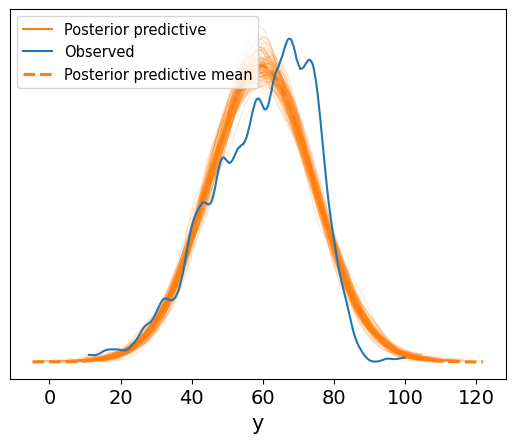

In [15]:
spotify = pd.read_csv("https://raw.githubusercontent.com/VikaK0828/Data-Science/main/Spotify-2000.csv")

X = spotify[["Danceability", "Energy", "Valence", "Acousticness"]]
Y = spotify["Popularity"].to_numpy()

with pm.Model() as bart_spotify:
    s = pm.HalfNormal('s', 1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ", pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=Y)
    idata_spotify = pm.sample(compute_convergence_checks=False)

pm.sample_posterior_predictive(idata_spotify, bart_spotify, extend_inferencedata=True)
az.plot_ppc(idata_spotify, num_pp_samples=100, colors=["C1", "C0", "C1"])

In this part of my project, I'm using a Bayesian Additive Regression Trees (BART) mokyghdel to analyze hoxw musical features like danceability, energy, valence, and acousticness contribute to a song’s popularity. I opularity to stabilize variance and make the data more suitable ffor modeling, then I use BART to capture pnotential nonlinear andx interaction effects betjween features. After fitting the model, I d a posterior vpredictive check to see how well my model replicates the observed datvca, and I visualize uncertainty using highest density intervals.

Output()

<Axes: xlabel='y'>

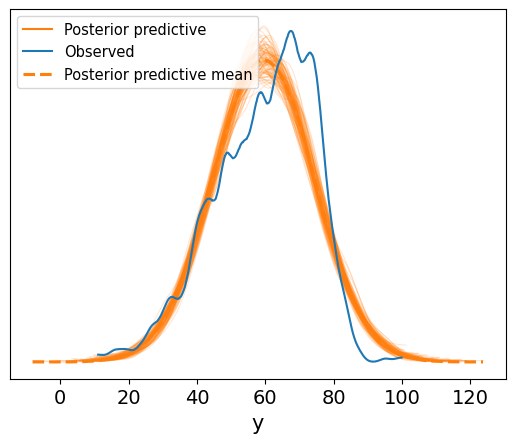

In [16]:
pm.sample_posterior_predictive(idata_spotify, bart_spotify, extend_inferencedata=True)
az.plot_ppc(idata_spotify, num_pp_samples=100, colors=["C1", "C0", "C1"])

I using posterior predictive sampling to see how well my BART model can replicate real-world dacta. By genergating s popularity valunmes from the model and comparing them to the actual data, In can visually check if the model fits well. This helps me evaluate whether the features mI chose, like danceability and energy, are good predictors of a song's popularity.

<Axes: xlabel='Danceability', ylabel='Popularity'>

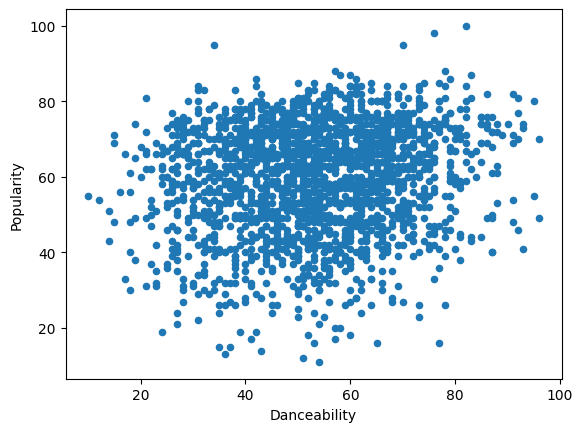

In [21]:
spotify.plot('Danceability', 'Popularity', kind='scatter')

I created a scatter plot tjo explore the relationship between Danceability and Popularity in my dataset. I wanted to visually check if more danceable songs tend to be mosre popuxar, which could help me decide whether Danceability is an important predictor. This kind of initial visualizationh helps me understand the data before building a more complex model.dc

In [20]:
posterior_mean = idata_spotify.posterior["μ"]

μ_hdi = az.hdi(
    idata_spotify,
    group="posterior",
    var_names=["μ"],
    hdi_prob=0.74
)

pps = az.extract(
    idata_spotify,
    group="posterior_predictive",
    var_names=["y"]
).T


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


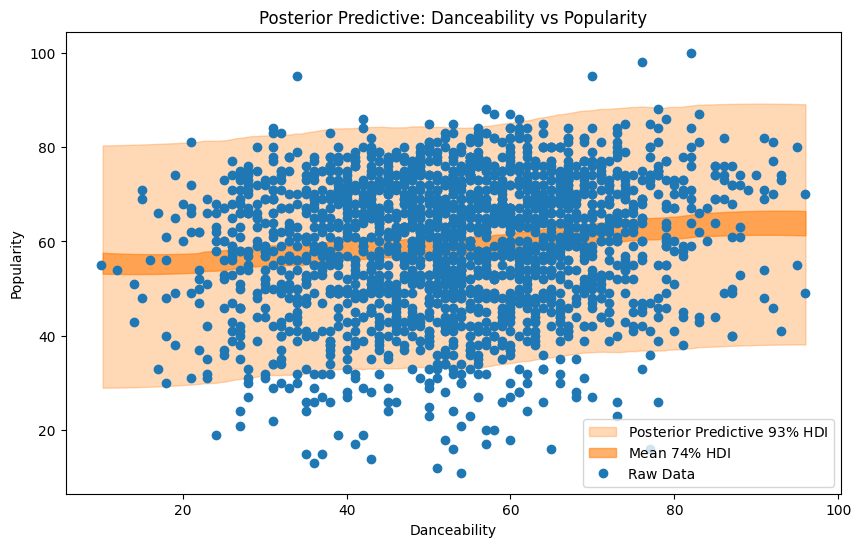

In [22]:

idx = np.argsort(X["Danceability"])

fig, ax = plt.subplots(figsize=(10, 6))

az.plot_hdi(
    x=X["Danceability"].values[idx],
    y=pps[:, idx],
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X["Danceability"].values[idx],
    y=posterior_mean.values[:, :, idx][0],
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)

ax.plot(X["Danceability"], Y, "o", c="C0", label="Raw Data")

ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive: Danceability vs Popularity",
    xlabel="Danceability",
    ylabel="Popularity"
)
plt.show()


In this code, I’m visualizihng the uncertainty in my BART model’s predictions by plotting highest density intervals (HDIs) for boththe posterior redictive distribution and the posterior mean. I used Danceability as my x-axis variable to see how it reates to th predictved Popularity valuens and compared the model’s prhedictions to the raw data. This helps me nderstand not just the average trend but also the range xof possible outcomes, showing how confident the model is at different levels of Danceabilit

array([<Axes: xlabel='Danceability'>, <Axes: xlabel='Energy'>,
       <Axes: xlabel='Valence'>, <Axes: xlabel='Acousticness'>],
      dtype=object)

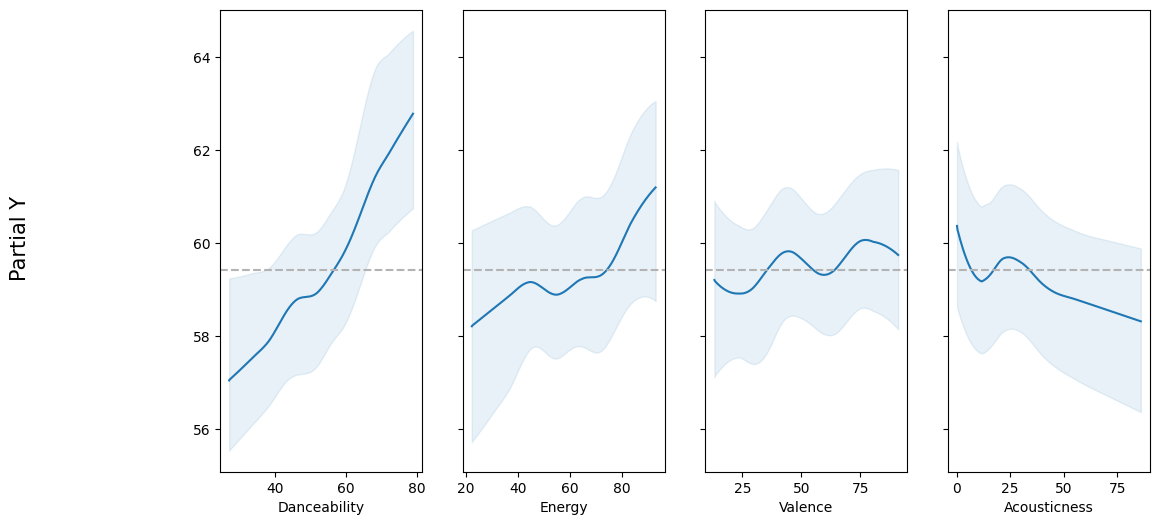

In [24]:
pmb.plot_pdp( μ_,X,Y,grid=(1, 4),func=np.exp,figsize=(12, 6)
)


 I’m plotting Partial Dependence Plots (PDPs) to see how each feature individually affects the predicted Popularity while averaging out the effects of the other features. Thhis helps me understand which features have the strongest influence oncn the model’s predictions and how they do so. I noticed that Danceability has a noticeable positive effect on Popularity, suggesting that more danceable songs tend to be more popular inn my dataset.

array([<Axes: xlabel='Danceability'>, <Axes: xlabel='Energy'>,
       <Axes: xlabel='Valence'>, <Axes: xlabel='Acousticness'>],
      dtype=object)

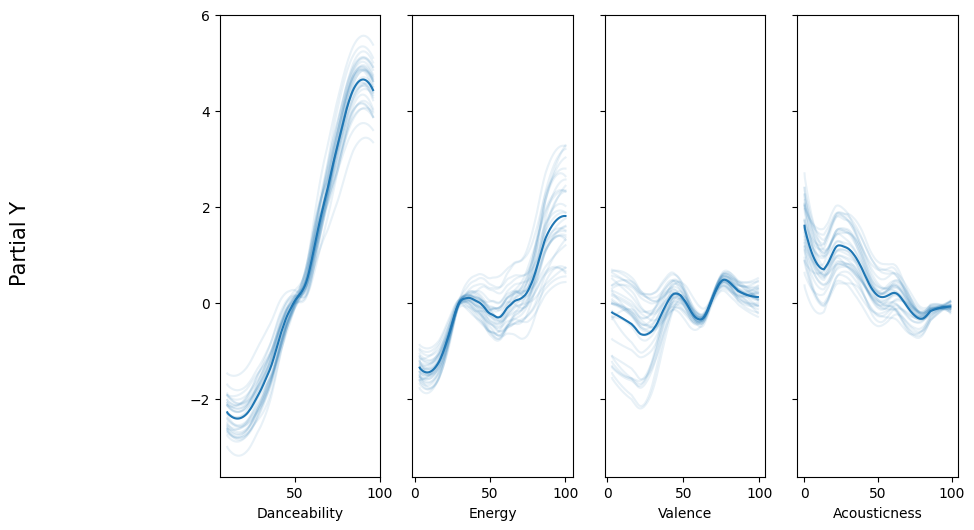

In [25]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In this line, I’m plotting Individual Conditional Expectation (ICE) plots to visualize how the predicted Popularity changes for each indiviual observation as a specific feature, lifke Danceability, varies. Unlike PDPs, which how the average effect, ICE plots allow me to see the effect on each individual data point, helpin o understand te model’s behavior more clearly. From this, I observe that wzhile most songs show a positive trend with Danceability, there are some that deviate, suggesting that the relationship betnween Danceability and Popularityis not strictly linear fo every song in the dataset

<Axes: ylabel='R²'>

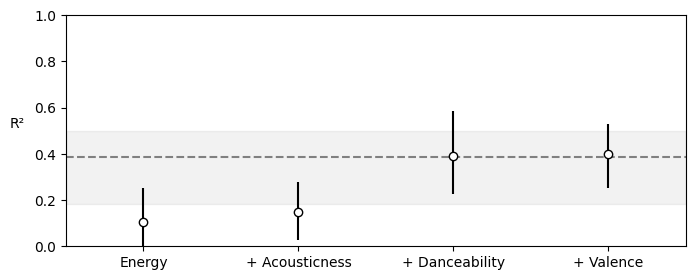

In [27]:
vi_spotify = pmb.compute_variable_importance(idata_spotify, μ_, X)

pmb.plot_variable_importance(vi_spotify)


In this step, I’m calculating the variabe impotance for the features in the model using the compute_variable_importance function. This helps me understand which features, scuch as Danceability or Energy, are most influential in predicting Populrity. By plotting the variable imporgtance, I can visually assess which variables have the greatest impac on the model's predictions, and from this, I can observe which characteritics of a song are most predicive of its populaity on Spotify.

##Conclusion

In conclusion, I found that features like Danceability and Energy have a stronger influence on song popularity than others, such as Acousticness or Liveness. By analyzing the data with BART, I observed that as Danceability and Energy increase, so does the likelihood of a song being more popular on Spotify. The variable importance analysis also reinforced this by highlighting these features as the most influential. This suggests that to boost a song's popularity, focusing on these characteristics would likely be a more effective strategy.